# Breast Cancer Detection

Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv("/content/BreastCancer.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
print("Rows and Columns in the given dataset are", data.shape[0], "&", data.shape[1], "respectively")

Rows and Columns in the given dataset are 569 & 6 respectively


In [ ]:
data.isnull().any()

mean_radius        False
mean_texture       False
mean_perimeter     False
mean_area          False
mean_smoothness    False
diagnosis          False
dtype: bool

In [ ]:
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

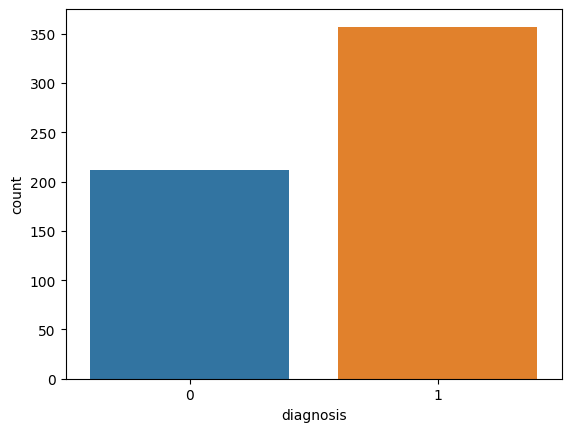

In [ ]:
sns.countplot(x="diagnosis", data=data)

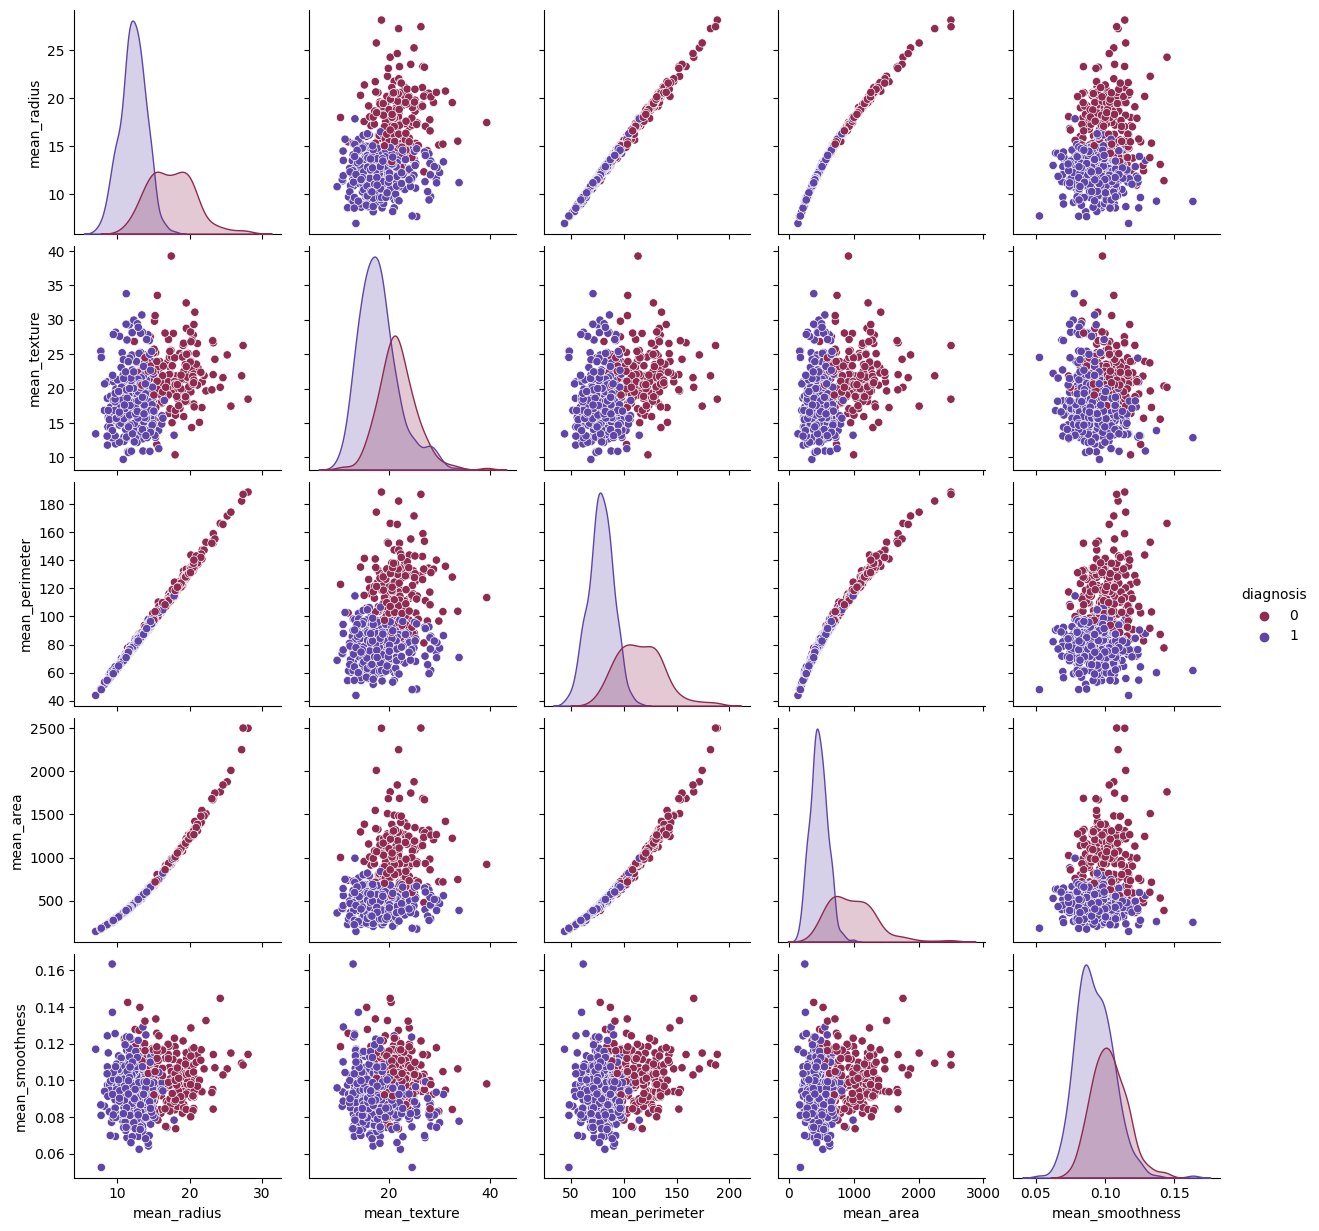

In [ ]:
sns.pairplot(data, hue="diagnosis", palette='twilight_r')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'mean_radius'),
  Text(1, 0, 'mean_texture'),
  Text(2, 0, 'mean_perimeter'),
  Text(3, 0, 'mean_area'),
  Text(4, 0, 'mean_smoothness'),
  Text(5, 0, 'diagnosis')])

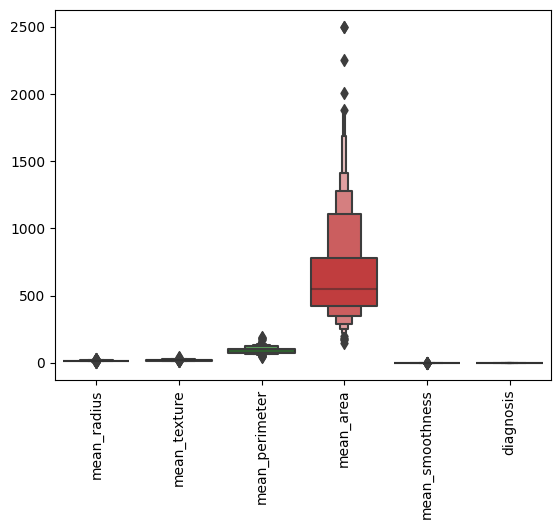

In [ ]:
plt.figure()
sns.boxenplot(data)
plt.xticks(rotation=90)

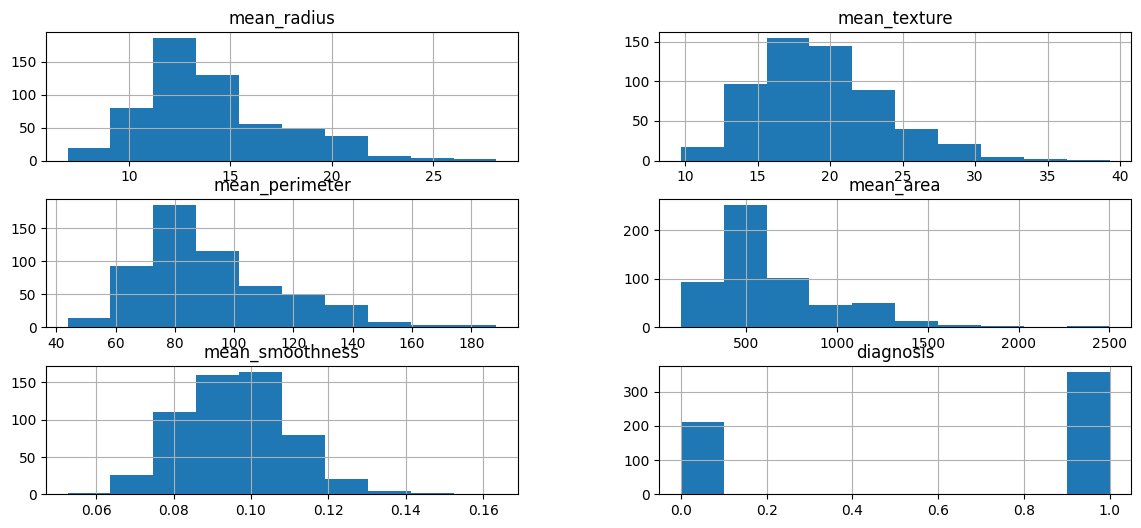

In [ ]:
# Individual distribuition of length and width
data.hist(linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(14,6)
plt.show()

<Axes: xlabel='diagnosis', ylabel='mean_texture'>

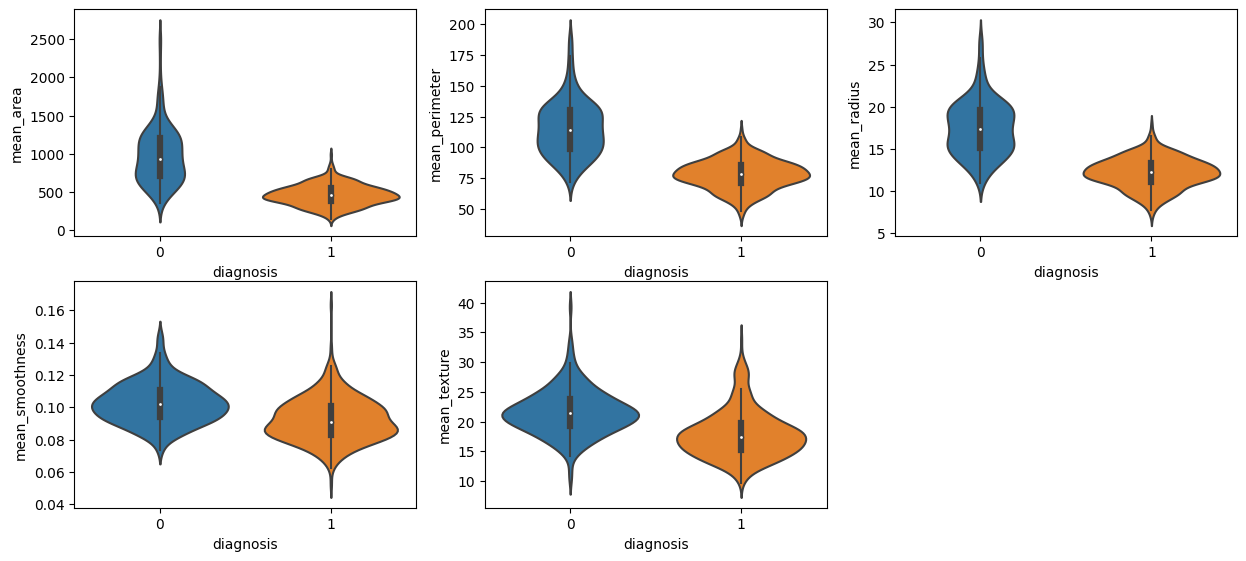

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.violinplot(x='diagnosis',y='mean_area',data=data)
plt.subplot(3,3,2)
sns.violinplot(x='diagnosis',y='mean_perimeter',data=data)
plt.subplot(3,3,3)
sns.violinplot(x='diagnosis',y='mean_radius',data=data)
plt.subplot(3,3,4)
sns.violinplot(x='diagnosis',y='mean_smoothness',data=data)
plt.subplot(3,3,5)
sns.violinplot(x='diagnosis',y='mean_texture',data=data)

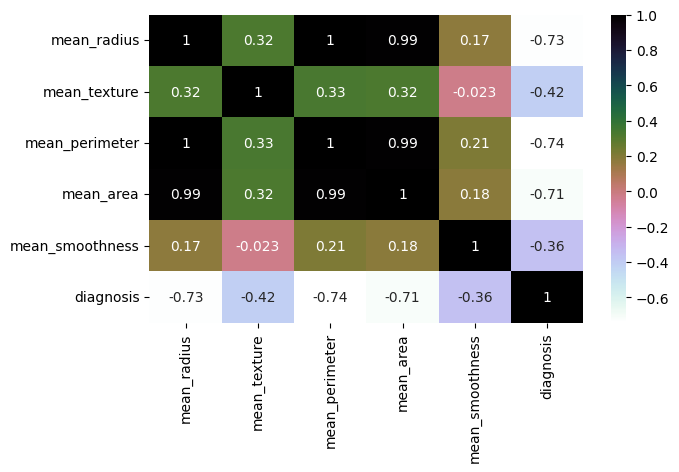

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r')
plt.show()

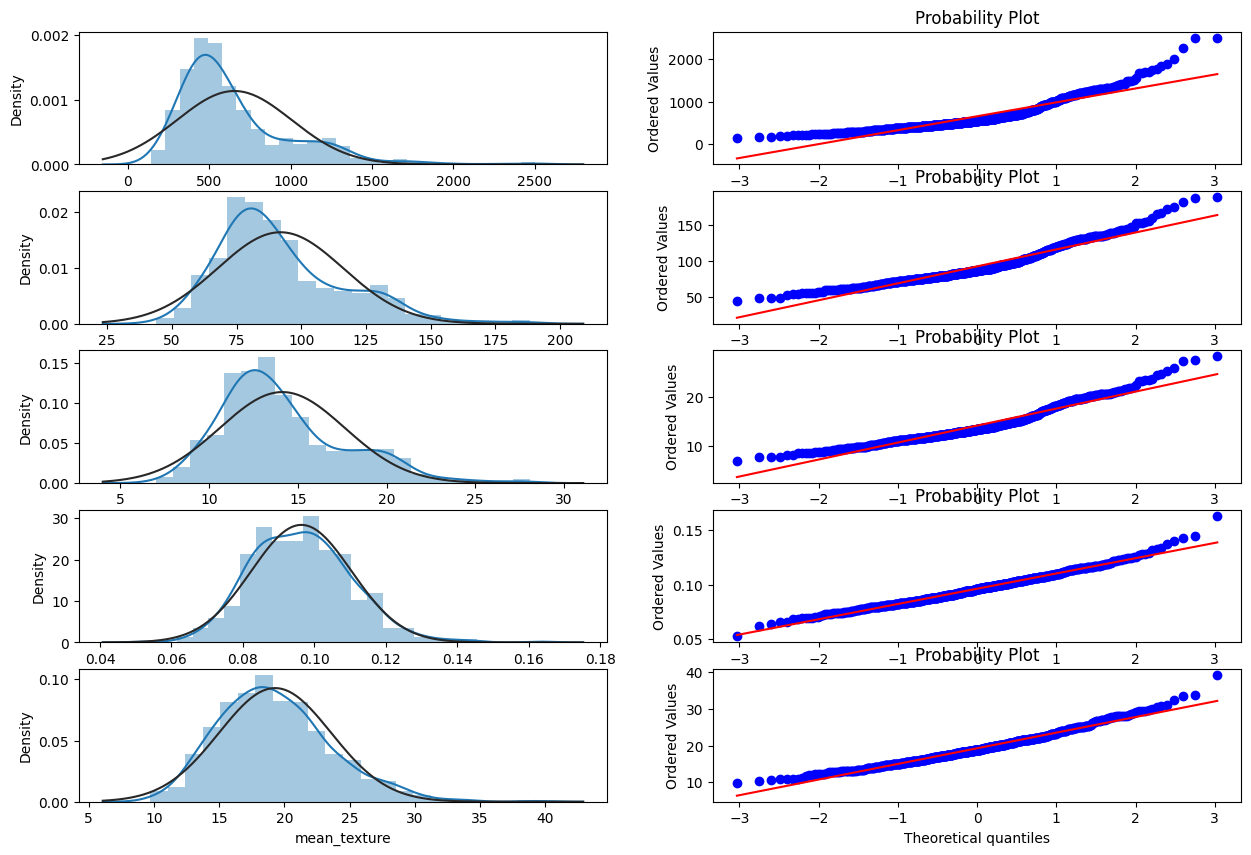

In [ ]:
# Checking the distribution via histograms and probability distribution
plt.figure(figsize=(15,10))
plt.subplot(5,2,1)
sns.distplot(data['mean_area'], fit=norm)
plt.subplot(5,2,2)
stats.probplot(data['mean_area'], dist = 'norm', plot = plt)
plt.subplot(5,2,3)
sns.distplot(data['mean_perimeter'], fit=norm)
plt.subplot(5,2,4)
stats.probplot(data['mean_perimeter'], dist = 'norm', plot = plt)
plt.subplot(5,2,5)
sns.distplot(data['mean_radius'], fit=norm)
plt.subplot(5,2,6)
stats.probplot(data['mean_radius'], dist = 'norm', plot = plt)
plt.subplot(5,2,7)
sns.distplot(data['mean_smoothness'], fit=norm)
plt.subplot(5,2,8)
stats.probplot(data['mean_smoothness'], dist = 'norm', plot = plt)
plt.subplot(5,2,9)
sns.distplot(data['mean_texture'], fit=norm)
plt.subplot(5,2,10)
stats.probplot(data['mean_texture'], dist = 'norm', plot = plt)
plt.show()

In [ ]:
X = data.drop('diagnosis', axis = 1)
y = data['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
accu_lr = accuracy_score(y_val,y_pred)
print("Accuracy score using Logistics Regression:", accu_lr*100)

Accuracy score using Logistics Regression: 93.7062937062937


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)
accu_reg = accuracy_score(y_val,y_pred)
print("Accuracy score using Random Forest:", accu_reg*100)

Accuracy score using Random Forest: 96.5034965034965


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(splitter='best', criterion="entropy")
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_val)
accu_dtc = accuracy_score(y_val,y_pred)
print("Accuracy score using Random Forest:", accu_dtc*100)

Accuracy score using Random Forest: 91.6083916083916


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','Decision Tree'],
    'Score': [accu_lr*100, accu_reg*100, accu_dtc*100]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,96.503497
0,Logistic Regression,93.706294
2,Decision Tree,91.608392


**The END!**